# Stock Market Data Analysis


### Stock Market Analysis and Prediction is the project related to Exploratory data analysis(EDA), Data visualization and Predictive analysis using data, provided by The Investors Exchange (IEX). I looked at real-time financial data from the stock market. I have used python libraries to get stock information, visualize different aspects of it, and finally I worked at a few ways of analyzing the risk of a stock, based on its previous performance history. I have also used statistical method called Monte Carlo Method to predict future stock prices.

We'll be answering the following questions along the way:

What was the change in price of the stock over time?

What was the daily return of the stock on average?

What was the moving average of the various stocks?

What was the correlation between different stocks' closing prices?

What was the correlation between different stocks' daily returns?

How much value do we put at risk by investing in a particular stock?

How can we attempt to predict future stock behavior?

## Basic Analysis of Stock Information

####  Requesting stock information with pandas, and analysing basic attributes of a stock.

In [14]:
#python library imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os

In [60]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

os.environ["IEX_API_KEY"] = "sk_6d57beca80284e74963c572b18f5531d" 

In [61]:
#to get rid of import error of pandas_datareader 
pd.core.common.is_list_like = pd.api.types.is_list_like

# For reading stock data from The Investors Exchange (IEX)
import pandas_datareader as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

###### Let's use iexfinanceThe Investors Exchange (IEX) and pandas to grab some data for some technology company stocks.

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)


#For loop for grabing iex finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'iex',start,end)

In [ ]:
#summarising the data
AAPL.head()


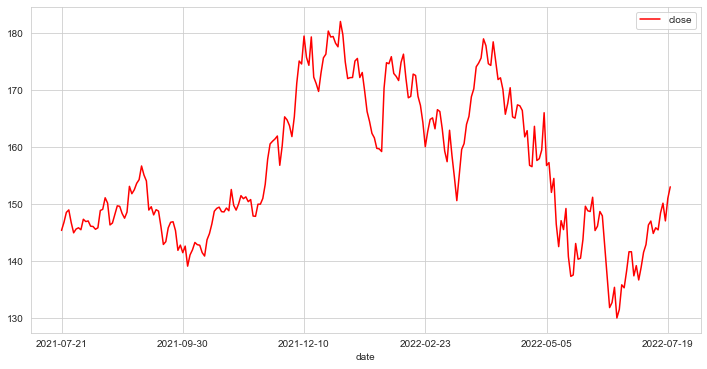

In [65]:
# Let's see a historical view of the closing price
AAPL['close'].plot(legend=True, figsize = (12, 6),color = 'red')
plt.show()

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['volume'].plot(legend=True,figsize=(10,4))
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

##### 'Moving Average - MA'

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [66]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MSFT[column_name]=pd.DataFrame.rolling(MSFT['close'],ma).mean()

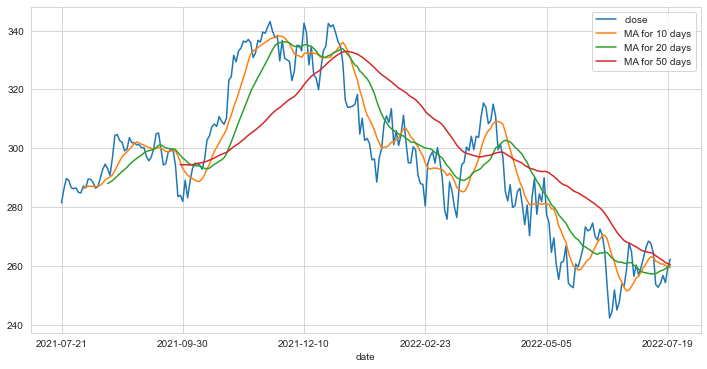

In [67]:
MSFT[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

#### Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

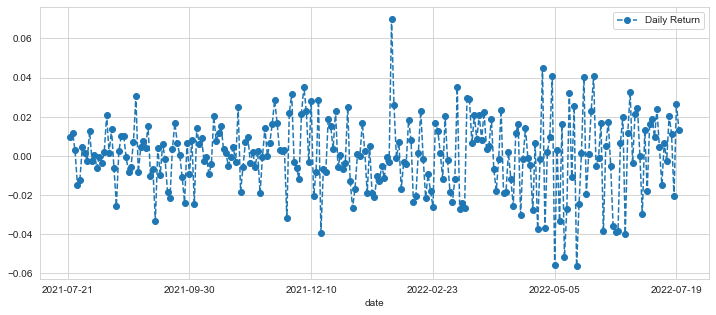

In [68]:
#use pct_change to find the percent change for each day

AAPL['Daily Return'] = AAPL['close'].pct_change()

# plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


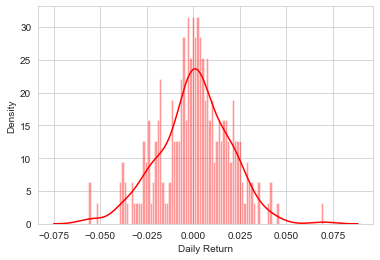

In [69]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')
plt.show()

Now want to analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.

In [70]:
closing_df1 = pd.DataFrame(AAPL['close'])
close1  = closing_df1.rename(columns={"close": "AAPL_close"})

closing_df2 = pd.DataFrame(GOOG['close'])
close2  = closing_df2.rename(columns={"close": "GOOG_close"})

closing_df3 = pd.DataFrame(MSFT['close'])
close3  = closing_df3.rename(columns={"close": "MSFT_close"})

closing_df4 = pd.DataFrame(AMZN['close'])
close4  = closing_df4.rename(columns={"close": "AMZN_close"})

closing_df = pd.concat([close1, close2, close3, close4], axis=1)
closing_df.head()

,AAPL_close,GOOG_close,MSFT_close,AMZN_close
date,,,,
2021-07-21,145.40,132.6005,281.40,179.2600
2021-07-22,146.80,133.3285,286.14,181.9015
2021-07-23,148.56,137.8160,289.67,182.8320
2021-07-26,148.99,139.6445,289.05,184.9910
2021-07-27,146.77,136.7965,286.54,181.3195


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

In [71]:
# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.



C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


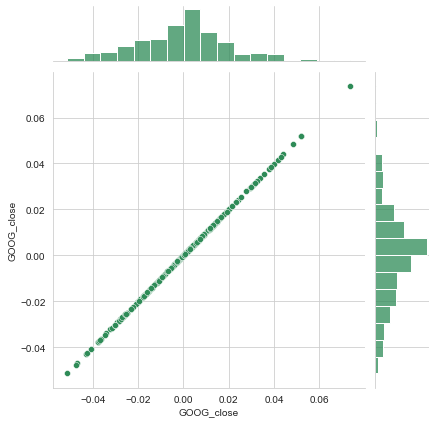

In [77]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG_close','GOOG_close',tech_returns,kind='scatter',color='seagreen')
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


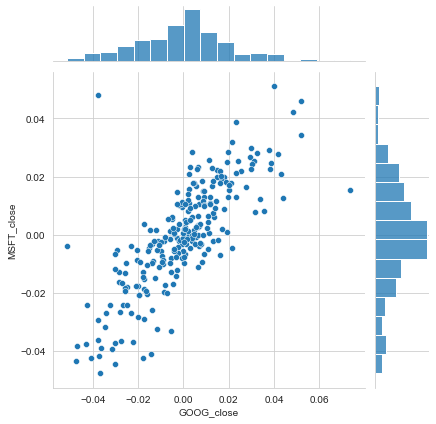

In [79]:
#We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG_close','MSFT_close',tech_returns,kind='scatter')
plt.show()

The pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give us a sense of how correlated the daily percentage returns are.

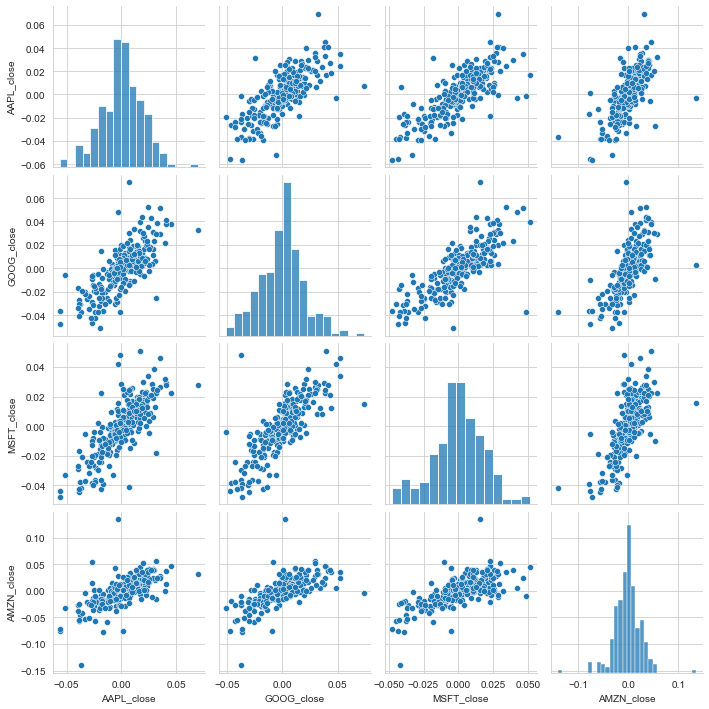

In [80]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())
plt.show()

Above we can see all the relationships on daily returns between all the stocks.

We can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.


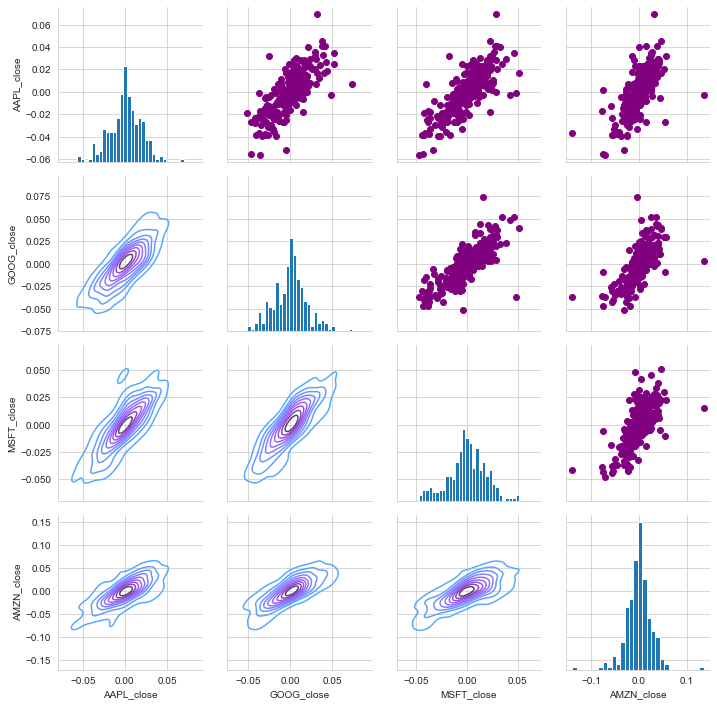

In [82]:
#It may arise warnings, to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


plt.show()

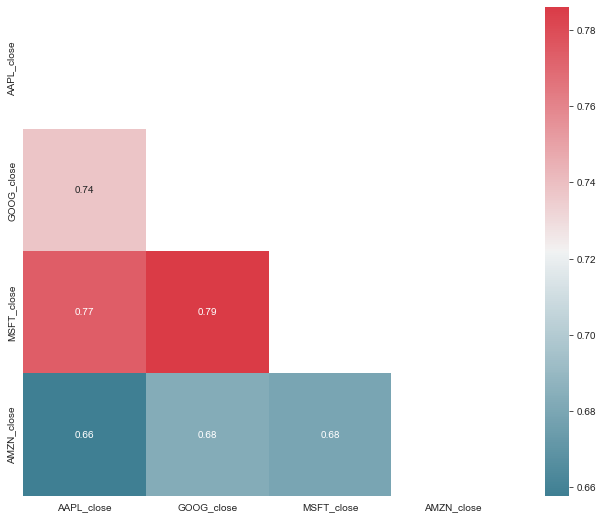

In [83]:
# use sebron for a quick correlation plot for the daily returns

# Compute the correlation matrix
corr = tech_returns.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

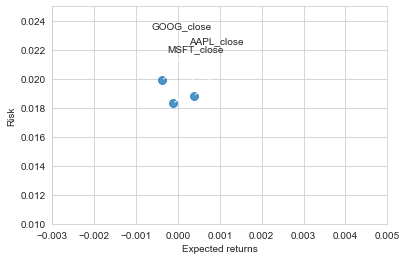

In [87]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.79,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.005])

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


##### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. 
Theres several methods we can use for estimating a value at risk. 
For this method we will calculate the empirical quantiles from a histogram of daily returns.

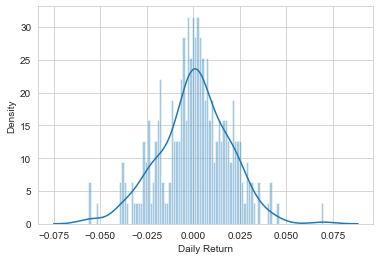

In [88]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)
plt.show()

Now we can use quantile to get the risk value for the stock.

In [89]:
# The 0.05 empirical quantile of daily returns
emp = rets['AAPL_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.03239011811730197


The 0.05 empirical quantile of daily returns is at -0.032. That means that with 95% confidence, our worst daily loss will not exceed 3.2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.032* 1,000,000 = $32,000.

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

Firstly, for specifying a model, We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH) - past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:GBM Equation

Where, S is the stock price, μ is the expected return (which we calculated earlier), σ is the standard deviation of the returns, t is time, and ϵ is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.Now GBM Equation

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. This is simply a way of scaling the standard deviation.

drift-shock

For more info on the Monte Carlo method for stocks, check out the following link: How to use Monte Carlo simulation with GBM

Secondly, to demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame 'GOOG'

In [90]:
# Set up our time
days = 365

# Now set delta t
deltaT = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOG_close
mu = rets.mean()['GOOG_close']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG_close']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we have already calculated from our daily returns

In [91]:
def monte_carlo_simulation(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, number days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [92]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2021-07-21,130.787,132.6173,130.6015,132.6005,14741640.0
2021-07-22,132.650,133.5045,132.4000,133.3285,13608140.0
2021-07-23,135.260,138.8085,134.7005,137.8160,26377740.0
2021-07-26,138.250,139.7130,137.6510,139.6445,23052460.0
2021-07-27,140.011,140.0110,135.1000,136.7965,42163060.0


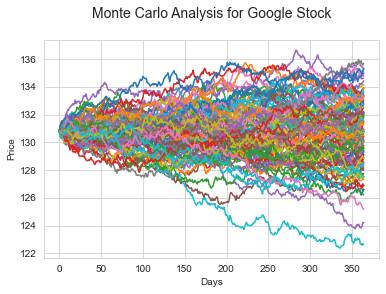

In [93]:
# Get start price(stock open price) from GOOG.head()
start_price = 130.787

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google Stock\n', fontsize = 14)
plt.show()

Get a histogram of the end results for a much larger run.

In [94]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

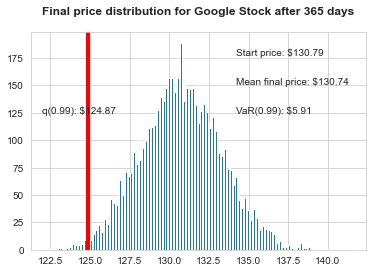

In [95]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days\n" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be 5.91 dollar for every investment of 130.74 dollar (the price of one inital google stock).

This means for every initial stock you purchase, you are putting about $5.91 at risk 99\% of the time from our Monte Carlo Simulation.